In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import math
import datetime
   #...: from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

os.chdir("C:\\Users\\mar77d\\OneDrive - CSIRO\\Documents\DA_project")


In [2]:
# import data
data = pd.read_csv('customer_segmentation.csv',engine = "python")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
counts = data.apply(lambda x: x.count())
nulls = data.apply(lambda x: x.isnull().sum())
distincts = data.apply(lambda x: x.unique().shape[0])
#skewness = data.skew()

str = pd.concat([counts, distincts, nulls],axis = 1)
str.columns = ['counts', 'distincts', 'nulls']
display(str)

,counts,distincts,nulls
InvoiceNo,541909,25900,0
StockCode,541909,4070,0
Description,540455,4224,1454
Quantity,541909,722,0
InvoiceDate,541909,23260,0
UnitPrice,541909,1630,0
CustomerID,406829,4373,135080
Country,541909,38,0


In [5]:
data = data[np.logical_and.reduce((~(data.CustomerID.isnull()), data.Quantity>0, data.UnitPrice>0))]
data.InvoiceDate = pd.to_datetime(data.InvoiceDate)
data['PriceSale'] = data.Quantity*data.UnitPrice
counts = data.apply(lambda x: x.count())
nulls = data.apply(lambda x: x.isnull().sum())
distincts = data.apply(lambda x: x.unique().shape[0])
str = pd.concat([counts, distincts, nulls],axis = 1)
str.columns = ['counts', 'distincts', 'nulls']
display(str)
data.describe()
# Remove negative or return transactions
#cs_df = cs_df[~(cs_df.Quantity<0)]
#cs_df = cs_df[cs_df.UnitPrice>0]

#details = rstr(cs_df)
#display(details.sort_values(by='distincts', ascending=False))
#data.describe()

,counts,distincts,nulls
InvoiceNo,397884,18532,0
StockCode,397884,3665,0
Description,397884,3877,0
Quantity,397884,301,0
InvoiceDate,397884,17282,0
UnitPrice,397884,440,0
CustomerID,397884,4338,0
Country,397884,37,0
PriceSale,397884,2939,0


,Quantity,UnitPrice,CustomerID,PriceSale
count,397884.000000,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453,22.397000
std,179.331775,22.097877,1713.141560,309.071041
min,1.000000,0.001000,12346.000000,0.001000
25%,2.000000,1.250000,13969.000000,4.680000
50%,6.000000,1.950000,15159.000000,11.800000
75%,12.000000,3.750000,16795.000000,19.800000
max,80995.000000,8142.750000,18287.000000,168469.600000


In [6]:
data[data.Quantity >=5000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PriceSale
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.6


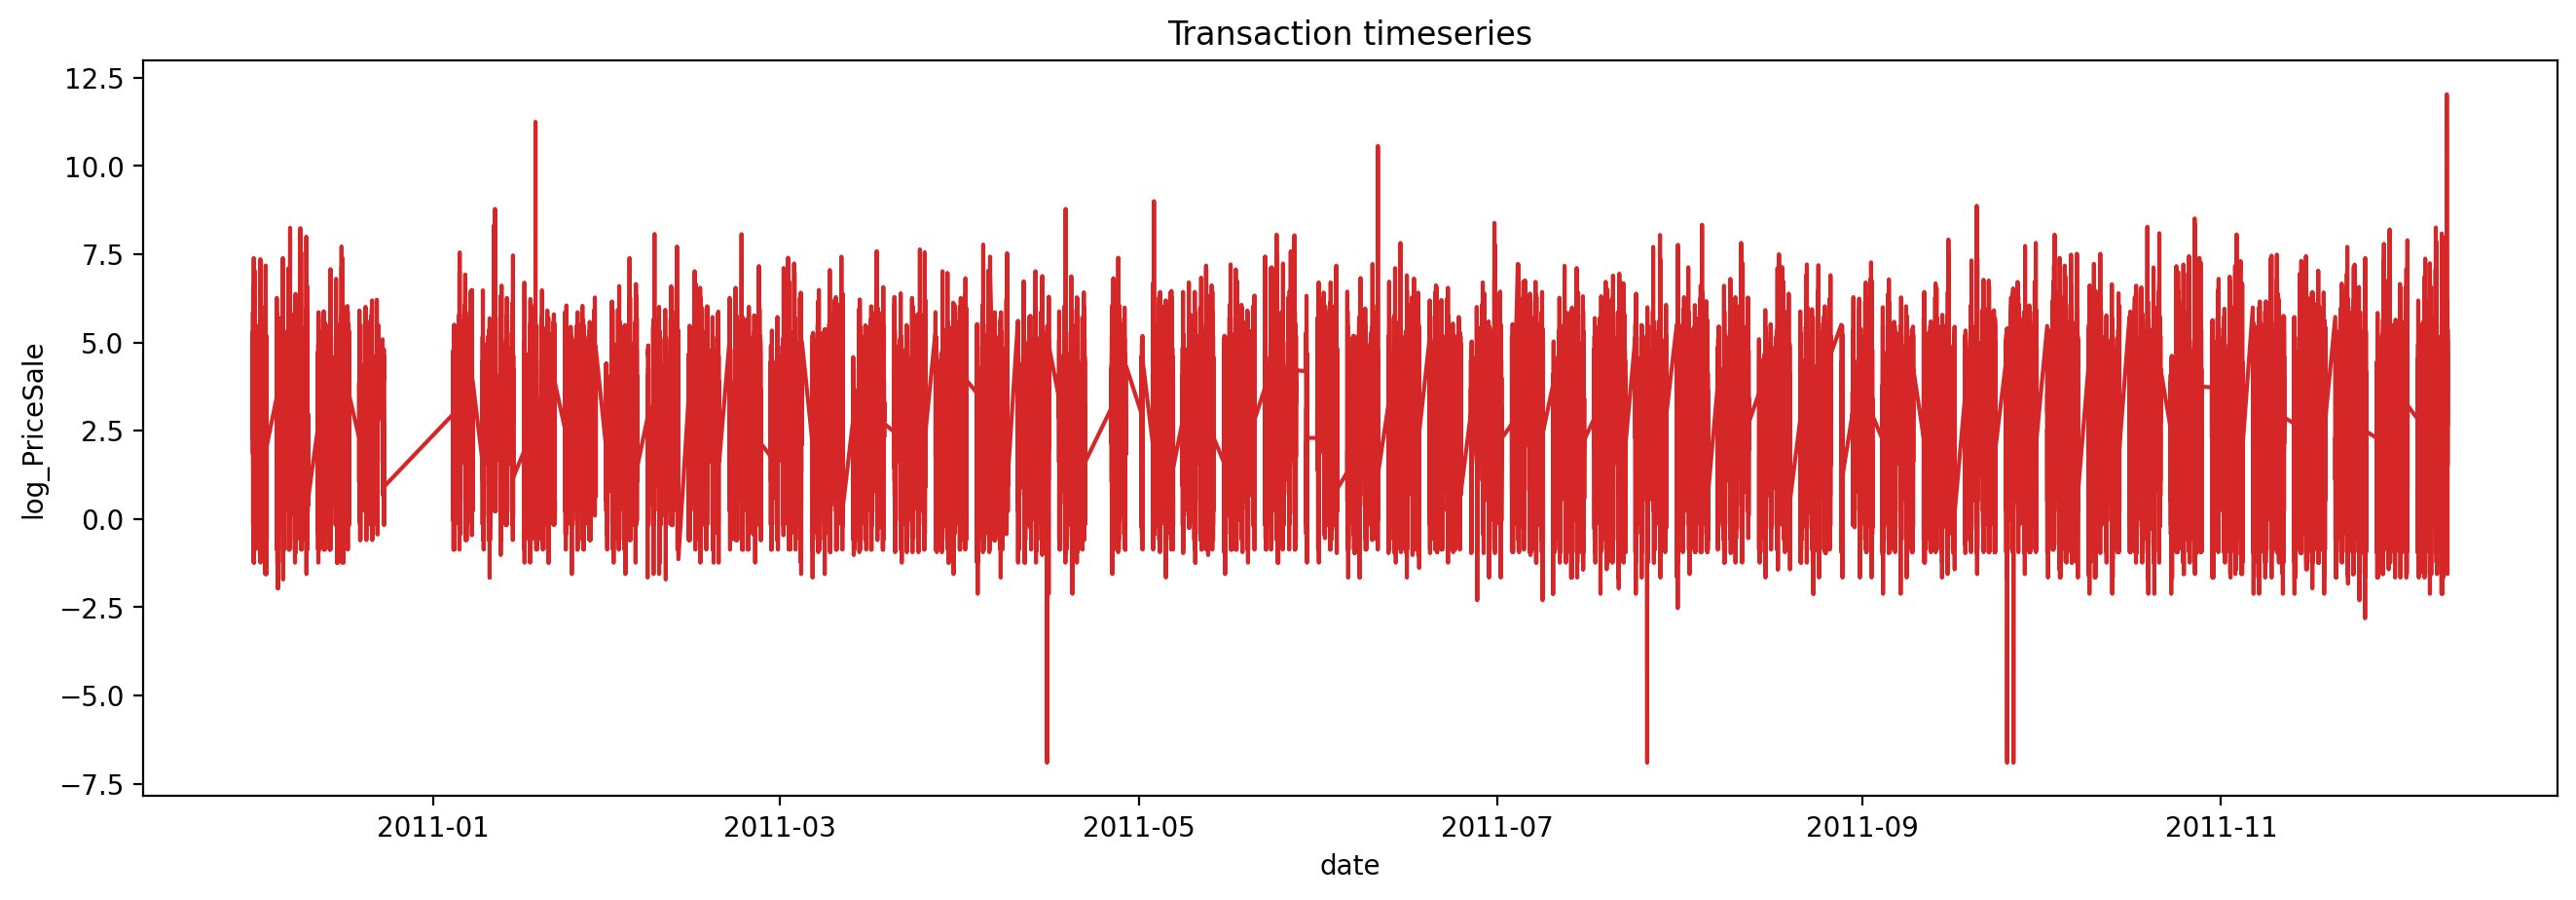

In [7]:
plt.figure(figsize=(10,4), dpi=200)
plt.plot(data.InvoiceDate, (data.PriceSale).apply(math.log), color='tab:red')
plt.gca().set(title='Transaction timeseries', xlabel='date', ylabel='log_PriceSale')
plt.show()

In [23]:
data['Year'] = pd.to_datetime(data.InvoiceDate).dt.year
data['Month'] = pd.to_datetime(data.InvoiceDate).dt.month
data['Week'] = pd.to_datetime(data.InvoiceDate).dt.isocalendar().week

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PriceSale,InvoiceDate_Year,InvoiceDate_Week,Year,Month,Week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,48,2010,12,48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,48,2010,12,48
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,48,2010,12,48
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,48,2010,12,48
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,48,2010,12,48


In [27]:
month_cty = data.groupby(["InvoiceDate_Year", "InvoiceDate_Week","Country"]).sum()
month_cty['time'] = datetime.date(month_cty.Year,mon_cty.Month,1)


NameError: name 'mon_cty' is not defined

In [29]:
plt.figure(figsize=(10,4), dpi=200)
plt.plot(, (data.PriceSale).apply(math.log), color='tab:red')
plt.gca().set(title='Transaction timeseries', xlabel='date', ylabel='log_PriceSale')
plt.show()

In [47]:
week_all = data.groupby(pd.Grouper(freq = 'M', key = 'InvoiceDate'))['PriceSale','Quantity'].sum()
week_all.Quantity = data.groupby(pd.Grouper(freq = 'W', key = 'InvoiceDate'))['PriceSale'].count()
week_all.columns = ['Sale','nb_tran']
week_all['Avg_tran'] = data.groupby(pd.Grouper(freq = 'W', key = 'InvoiceDate'))['PriceSale'].mean()

#display(week_all)

month_cty = data.groupby(["InvoiceDate_Year", "InvoiceDate_Week","Country"]).sum()
display(month_cty)

<ipython-input-47-c5522705a5c8>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  week_all = data.groupby(pd.Grouper(freq = 'M', key = 'InvoiceDate'))['PriceSale','Quantity'].sum()


Quantity  UnitPrice  \
InvoiceDate_Year InvoiceDate_Week Country                               
2010             48               Australia            107      73.90   
                                  Belgium              528      37.41   
                                  EIRE                2624     442.05   
                                  France              1299     432.36   
                                  Germany             1836     577.24   
...                                                    ...        ...   
2011             49               Portugal             537     239.55   
                                  Spain                274     129.61   
                                  Sweden                40       5.95   
                                  USA                  408      42.71   
                                  United Kingdom    204281   26618.87   

                                                   CustomerID  PriceSale  \
InvoiceDate_Year InvoiceDate_Week Country                                  
2010             48               Australia          174034.0     358.25   
                                  Belgium            148740.0     346.10   
                                  EIRE              1429191.0    2605.73   
                                  France            1335095.0    2808.16   
                                  Germany           2076212.0    3449.05   
...                                                       ...        ...   
2011             49               Portugal           677111.0    1371.26   
                                  Spain             1055445.0     316.21   
                                  Sweden              17404.0     238.00   
                                  USA                265566.0     615.28   
                                  United Kingdom  157648859.0  372946.26   

                                                      Year   Month    Week  
InvoiceDate_Year InvoiceDate_Week Country                                   
2010             48               Australia          28140     168     672  
                                  Belgium            24120     144     576  
                                  EIRE              192960    1152    4608  
                                  France            213060    1272    5088  
                                  Germany           331650    1980    7920  
...                                                    ...     ...     ...  
2011             49               Portugal          106583     636    2597  
                                  Spain             130715     780    3185  
                                  Sweden              2011      12      49  
                                  USA                42231     252    1029  
                                  United Kingdom  20403606  121752  497154  

[693 rows x 7 columns]

In [58]:
month_cty[np.in1d(month_cty.index.get_level_values(2),['France'])]

Quantity  UnitPrice  CustomerID  \
InvoiceDate_Year InvoiceDate_Week Country                                    
2010             48               France       1299     432.36   1335095.0   
                 49               France       2308     560.73   2252678.0   
                 50               France        535     175.46    994964.0   
                 51               France        847     368.96    901148.0   
2011             1                France       1852     626.94   2094536.0   
                 2                France       3377     732.72   2938528.0   
                 3                France       1488     448.76   1722042.0   
                 4                France        660     278.35    774453.0   
                 5                France       3007     526.30   2211891.0   
                 6                France        971     145.43    683432.0   
                 7                France       1759     305.75   1635971.0   
                 8                France        767     224.61    843687.0   
                 9                France       1705     571.90   2063448.0   
                 10               France        510     148.77    479918.0   
                 11               France       1087     277.24   1024641.0   
                 12               France       1849     565.18   2274935.0   
                 13               France       4525     395.65   1939838.0   
                 14               France        538    1444.30    673065.0   
                 15               France        689     216.85    783786.0   
                 16               France        501     222.10    794186.0   
                 17               France        231      96.55    451540.0   
                 18               France       1925     327.53   1583294.0   
                 19               France       3302     796.39   3034085.0   
                 20               France       2429     880.28   2640630.0   
                 21               France       1929     478.16   1774591.0   
                 22               France       2112     311.25   1104085.0   
                 23               France       3126     492.40   2175667.0   
                 24               France       2631     803.35   2714708.0   
                 25               France       1684     303.22   1248203.0   
                 26               France        592     140.12    552230.0   
                 27               France       1839     517.10   2202822.0   
                 28               France       1620     581.80   1509087.0   
                 29               France       1190     221.47    896452.0   
                 30               France        651     155.04    735019.0   
                 31               France       1518     230.04   1035427.0   
                 32               France        380     144.89    518488.0   
                 33               France       2202     552.71   2236069.0   
                 34               France       2714     640.33   2999348.0   
                 35               France       2080     523.03   1496010.0   
                 36               France       3990     994.51   4573470.0   
                 37               France       1742     252.86    915661.0   
                 38               France       3938    1215.25   4319377.0   
                 39               France       2396     576.36   2216495.0   
                 40               France       2071     855.07   3561612.0   
                 41               France       4036    1173.58   4710166.0   
                 42               France       1263     258.65    939348.0   
                 43               France       6021    8842.63   1640329.0   
                 44               France       3114     699.99   3439828.0   
                 45               France       4408    1061.40   4924445.0   
                 46               France       4521    1322.66   